In [3]:
# This tutorial teaches you how to extract bag-of-words representations
# from documents using scikit-learn's facilities and NLTK
#
import sklearn
import numpy as np

In [4]:
import matplotlib.pyplot as plt

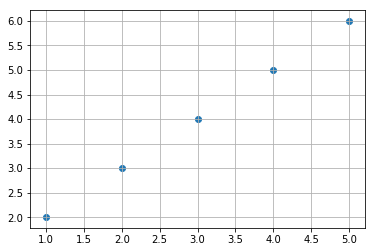

In [5]:
# example of use of pyplot
data = np.array([[1,2], [2,3], [3,4], [4,5], [5,6]])
x = data[:,0]
y= data[:,1]
plt.scatter(x,y)
plt.grid(True)
plt.show()

In [6]:
# Text processing with Scikit-Learn, basics
# Creating a vectorizer that can be used to extract a bag of words
# representation from documents
#
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=1)

In [8]:
# Toy example
content = ["How to format my hard disk", "Hard disk format problems"]
X = vectorizer.fit_transform(content)

In [9]:
# Check what features were extracted
vectorizer.get_feature_names()

[u'disk', u'format', u'hard', u'how', u'my', u'problems', u'to']

In [10]:
# See the representation of the two 'documents' in terms of these features
X.toarray()

array([[1, 1, 1, 1, 1, 0, 1],
       [1, 1, 1, 0, 0, 1, 0]])

In [11]:
# The representation of the first document
X.toarray()[0]

array([1, 1, 1, 1, 1, 0, 1])

In [12]:
# A more realistic example, using the '20 Newsgroups' dataset
# of 20,000 documents belonging to 20 categories (included in scikit-learn)
#
from sklearn.datasets import fetch_20newsgroups
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 
              'sci.med']

In [13]:
# This command actually imports the docs in the dataset belonging to those
# 4 categories. This is going to take a while!
twenty_train = fetch_20newsgroups(subset='train', categories=categories, 
                                  shuffle=True, random_state=42)

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

In [19]:
# Now we can produce vector representations of the documents
# (NB fetch_20newsgroups stored the documents in the data attribute of the 
# variable twenty_train)
train_counts = vectorizer.fit_transform(twenty_train.data)

In [20]:
# For more sophisticated preprocessing, NLTK can be used.
#
import nltk

In [22]:
# NLTK includes implementations of most tools
# For instance, stemmers
# 
s = nltk.stem.SnowballStemmer('english')
s.stem("cats")

u'cat'

In [24]:
# Or tokenizers
#
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/massimo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [26]:
text = word_tokenize("And now for something completely different")
print(text)

['And', 'now', 'for', 'something', 'completely', 'different']


In [29]:
# This vectorizer doesn't include  stop words
#
nsw_vectorizer = CountVectorizer(stop_words='english')
analyze = nsw_vectorizer.build_analyzer()
print(analyze("John bought carrots and potatoes"))

[u'john', u'bought', u'carrots', u'potatoes']


In [32]:
# POS tagging
#
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_treebank_pos_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/massimo/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_treebank_pos_tagger to
[nltk_data]     /Users/massimo/nltk_data...
[nltk_data]   Package maxent_treebank_pos_tagger is already up-to-
[nltk_data]       date!


True

In [33]:
nltk.pos_tag(text)

[('And', 'CC'),
 ('now', 'RB'),
 ('for', 'IN'),
 ('something', 'NN'),
 ('completely', 'RB'),
 ('different', 'JJ')]

In [35]:
# Now let us define a vectorizer that incorporates NLTK's stemmer
#
import nltk.stem

In [36]:
# The following code specifies a subclass of CountVectorizer
# whose build_analyzer() method is defined as a function that 
# takes as input a document and then for each word in the document
# first calls the default analyzer for CountVectorizer, then applies
# NLTK's English stemmer
#
english_stemmer = nltk.stem.SnowballStemmer('english')
class StemmedCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(StemmedCountVectorizer, self).build_analyzer()
        return lambda doc: (english_stemmer.stem(w) for w in analyzer(doc))

In [39]:
stem_vectorizer = StemmedCountVectorizer(min_df=1, stop_words='english')
stem_analyze = stem_vectorizer.build_analyzer()
Y = stem_analyze("John bought carrots and potatoes")
for tok in Y:
    print(tok)

john
bought
carrot
potato
